## PyTorch

## Data Loader

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
torch_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=True,download=True,
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5,),std=(0.5,))
                  ])),
    batch_size = 32,
    shuffle = True)

In [3]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=False,
                  transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,),(0.5))
                  ])),
    batch_size = 32,
    shuffle = True)

In [4]:
images, labels = next(iter(test_loader))

In [5]:
images.shape

torch.Size([32, 1, 28, 28])

In [6]:
labels.shape

torch.Size([32])

## 데이터 시각화

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
images[0].shape

torch.Size([1, 28, 28])

In [9]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [10]:
image = torch_image.numpy()
image.shape

(28, 28)

In [11]:
label = labels[0].numpy()
label

array(7, dtype=int64)

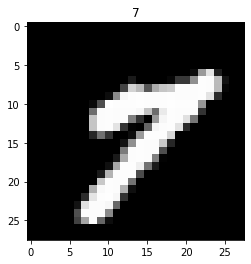

In [12]:
plt.title(labels[0].numpy())
plt.imshow(torch_image.numpy(),'gray')
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [14]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1)

In [15]:
image, label = next(iter(train_loader))

In [16]:
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

## Convolution
- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수  
- kernel_size: 만들고 싶은 kernel(weights)의 사이즈
- 채널을 지정해줘야 된다 채널 몇개를 받는지 적어야한다

In [17]:
nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [18]:
nn.Conv2d(1,20,5,1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [19]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 시각화를 위해 slice하고 numpy화 해야 한다
    - weight는 학습 가능한 상태이기 때문에 numpy로 뽑아낼 수 없음
    - detach() method는 그래프에서 추출해서 gradient에 영향을 받지 않게 함

In [20]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [21]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

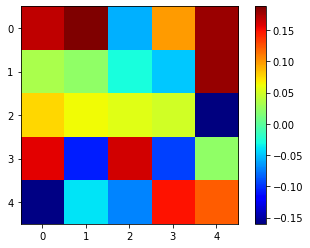

In [22]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

- 시각화 준비를 위해 numpy화

In [23]:
output_data = layer(image)
output_data = output_data.data
output = output_data.cpu().numpy()
output.shape

(1, 20, 24, 24)

- input으로 들어간 이미지 numpy화

In [24]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

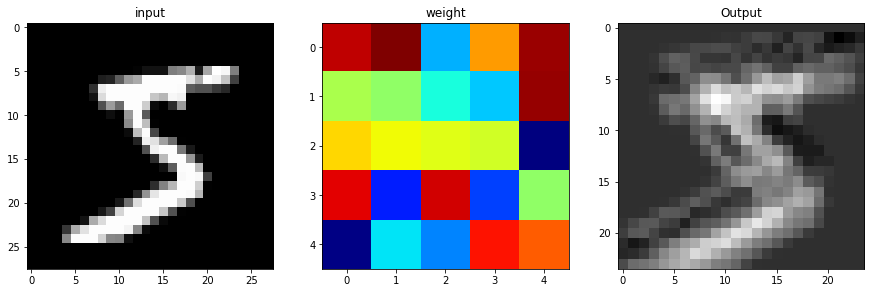

In [25]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("input")
plt.imshow(np.squeeze(image_arr),'gray')

plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output[0,0,:,:],'gray')
plt.show()

## Pooling
- input을 먼저 앞에 넣고 뒤에 kernel 사이즈와 stride를 순서대로 넣음

In [26]:
image.shape

torch.Size([1, 1, 28, 28])

In [27]:
pool = F.max_pool2d(image,2,2)
pool.shape

torch.Size([1, 1, 14, 14])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()가능

In [28]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

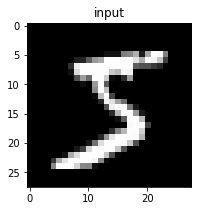

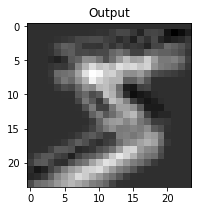

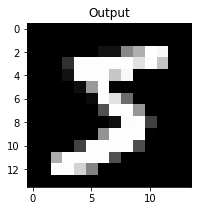

In [29]:
# 기본이미지
plt.figure(figsize=(10,15))
plt.subplot(131)
plt.title("input")
plt.imshow(np.squeeze(image_arr),'gray')
# Convolution
plt.figure(figsize=(10,15))
plt.subplot(132)
plt.title("Output")
plt.imshow(output[0,0,:,:],'gray')
plt.show()
# Pooling
plt.figure(figsize=(10,15))
plt.subplot(133)
plt.title("Output")
plt.imshow(np.squeeze(pool_arr),'gray')
plt.show()

## Linear
- nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함
- PyTorch는 Flatten이 없기 때문에 reshape나 view로 해줘야한다

In [30]:
image.shape

torch.Size([1, 1, 28, 28])

In [31]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [32]:
lin = nn.Linear(784, 10)(flatten) # 784개를 받아서 10개로 내보낸다
lin.shape

torch.Size([1, 10])

In [33]:
lin

tensor([[-0.0877, -0.1221,  0.2499,  0.2049,  0.1174, -0.0186,  0.2125, -0.2004,
         -0.3213, -0.0284]], grad_fn=<AddmmBackward>)

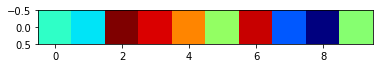

In [34]:
plt.imshow(lin.detach().numpy(),'jet')
plt.show()

## Softmax
- 결과를 numpy로 꺼내기 위해서는 weight가 담긴 Linear에 weight를 꺼줘야함

In [35]:
with torch.no_grad():
    flatten = image.view(1,28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin,dim=1)

In [36]:
softmax

tensor([[0.1114, 0.0791, 0.0812, 0.0891, 0.1081, 0.1259, 0.0863, 0.0731, 0.1303,
         0.1154]])

In [37]:
np.sum(softmax.numpy())

1.0

## Layer 쌓기

- nn과 nn.function의 차이점
    - nn은 학습 파라미터가 담긴 것
    - nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
    

In [39]:
model = Net()

In [40]:
result = model.forward(image)

In [41]:
result

tensor([[-2.2954, -2.2894, -2.3039, -2.3847, -2.2287, -2.3344, -2.2966, -2.2822,
         -2.3471, -2.2718]], grad_fn=<LogSoftmaxBackward>)

In [42]:
model.conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

## PyTorch: Optimization & Training

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np

In [44]:
seed = 1 # 데이터가 셔플해서 들어갈때 셔플을 하더라도 같이 섞는 것

batch_size = 64
test_batch_size = 64

no_cuda = False

In [45]:
use_cuda = not no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Preprocess

In [46]:
torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)

## Model

In [47]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Optimization
- Model과 Optimization 설정

In [48]:
model = Net().to(device) # device에 담아준다

In [49]:
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.5)

- Parameters들 확인(굳이 보려면 이렇게 하면됨)
    - Weight, Bais를 순서대로 보여줌

In [50]:
params = list(model.parameters())
for i in range(8):
    print(params[i].size())

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([50, 20, 5, 5])
torch.Size([50])
torch.Size([500, 800])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])


## Before Training
- 학습하기 전에 Model이 Train할 수 있도록 Train Mode로 변환
    - Convolution 또는 Linear 뿐만 아니라, DropOut과 추후에 배우게 될 Batch Normalization과 같이 parameter를 가진 Layer들도 학습하기 위해 준비

In [51]:
model.train() # train mode

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

- 모델에 넣기 위한 첫 Batch 데이터 추출

In [52]:
data, target = next(iter(train_loader))

In [53]:
data.shape, target.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

- 추출한 Batch 데이터를 cpu 또는 gpu와 같은 device에 compile

In [54]:
data, target = data.to(device), target.to(device)

In [55]:
data.shape, target.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

- gradients를 clear해서 새로운 최적화 값을 찾기 위해 준비

In [56]:
optimizer.zero_grad()

- 준비한 데이터를 model에 input으로 넣어 output을 얻음

In [57]:
output = model(data)

- Model에서 예측한 결과를 Loss Function에 넣음
    - 여기 예제에서는 Negative Log-Likelihood Loss 라는 Loss Function을 사용

In [58]:
loss = F.nll_loss(output, target)

- Back Propagation을 통해 Gradients를 계산

In [59]:
loss.backward()

- 계산된 Gradients는 계산된 걸로 끝이 아니라 Parameter에 Update

In [60]:
optimizer.step()

## Start Training
- 위의 최적화 과정을 반복하여 학습 시작

In [61]:
epochs = 1
log_interval = 100 # 100개의 step이 거칠때마다 보여줄 것이다

In [62]:
for epoch in range(1, epochs+1):
    # Train Mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 한번들어올때마다 인덱스가 들어온다
        data, target = data.to(device), target.to(device) # 데이터를 뽑았다
        optimizer.zero_grad() # gradient(경사도)를 clear
        output = model(data) # 앞에서 받은 데이터를 모델에 넣는다
        loss = F.nll_loss(output, target) # 비교해서 loss를 뽑음
        loss.backward() # 기울기 계산
        optimizer.step() # 업데이트
        
        if batch_idx % log_interval == 0: # 학습이 되는지 안되는지 로그를 보기
            print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss : {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                # 몇번째 데이터 인지 , 전체 데이터 수 반환 (len(data)는 배치사이즈)
                100 * batch_idx / len(train_loader), loss.item()
            ))

Train Epoch : 1 [0/60000 (0%)]	Loss : 2.290736
Train Epoch : 1 [6400/60000 (11%)]	Loss : 2.228956
Train Epoch : 1 [12800/60000 (21%)]	Loss : 2.121075
Train Epoch : 1 [19200/60000 (32%)]	Loss : 1.893548
Train Epoch : 1 [25600/60000 (43%)]	Loss : 1.570037
Train Epoch : 1 [32000/60000 (53%)]	Loss : 1.213112
Train Epoch : 1 [38400/60000 (64%)]	Loss : 0.993902
Train Epoch : 1 [44800/60000 (75%)]	Loss : 0.778629
Train Epoch : 1 [51200/60000 (85%)]	Loss : 0.732979
Train Epoch : 1 [57600/60000 (96%)]	Loss : 0.624407


## Evaluation
- 앞에서 model.train() 모드로 변한 것처럼 평가 할 때는 model.eval()로 설정
    - Batch Normalization이나 Drop Out 같은 Layer들을 잠금

In [63]:
model.eval() # 평가모드 시작

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

- autograd engine, 즉 backpropagatin이나 gradient 계산 등을 꺼서 memory usage를 줄이고 속도를 높임

In [64]:
test_loss = 0
correct = 0

with torch.no_grad(): # 테스트 모드때는 꺼주는게 중요
    data, target = next(iter(test_loader))
    data, target = data.to(device), target.to(device)
    output = model(data)
    
    test_loss += F.nll_loss(output, target, reduction='sum').item() # 로그를 보기 위해
    # reduction은 한번에 하나의 스칼라로 리턴해주며 계산해준다
    
    pred = output.argmax(dim=1, keepdim=True) # 컴퓨터가 생각하는 정답을 꺼내보고
    # 차원 수는 계속 유지
    correct = pred.eq(target.view_as(pred)).sum() # 같은 것끼리 True는 True끼리 더한다
    # 그것을 correct에 담는다
    

In [65]:
test_loss

33.745365142822266

In [66]:
output.shape

torch.Size([64, 10])

In [67]:
pred.shape

torch.Size([64, 1])

In [68]:
target.view_as(pred).shape

torch.Size([64, 1])

In [69]:
pred.eq(target.view_as(pred))

tensor([[ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True

In [70]:
pred.eq(target.view_as(pred)).sum()

tensor(53)

In [71]:
pred.eq(target.view_as(pred)).sum().item() / 64

0.828125

In [72]:
test_loss /= len(test_loader.dataset)

In [73]:
test_loss

0.0033745365142822266

In [74]:
model.eval()

test_loss = 0
correct = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))


Test set: Average Loss: 0.4799, Accuracy: 8661/10000 (87%)



## 완성본

In [75]:
for epoch in range(1, epochs+1):
    # Train Mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 한번들어올때마다 인덱스가 들어온다
        data, target = data.to(device), target.to(device) # 데이터를 뽑았다
        optimizer.zero_grad() # gradient(경사도)를 clear
        output = model(data) # 앞에서 받은 데이터를 모델에 넣는다
        loss = F.nll_loss(output, target) # 비교해서 loss를 뽑음
        loss.backward() # 기울기 계산
        optimizer.step() # 업데이트
        
        if batch_idx % log_interval == 0: # 학습이 되는지 안되는지 로그를 보기
            print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss : {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                # 몇번째 데이터 인지 , 전체 데이터 수 반환 (len(data)는 배치사이즈)
                100 * batch_idx / len(train_loader), loss.item()
            ))
    # Test Mode        
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

Train Epoch : 1 [0/60000 (0%)]	Loss : 0.643394
Train Epoch : 1 [6400/60000 (11%)]	Loss : 0.454844
Train Epoch : 1 [12800/60000 (21%)]	Loss : 0.403857
Train Epoch : 1 [19200/60000 (32%)]	Loss : 0.480942
Train Epoch : 1 [25600/60000 (43%)]	Loss : 0.380607
Train Epoch : 1 [32000/60000 (53%)]	Loss : 0.338354
Train Epoch : 1 [38400/60000 (64%)]	Loss : 0.281217
Train Epoch : 1 [44800/60000 (75%)]	Loss : 0.383315
Train Epoch : 1 [51200/60000 (85%)]	Loss : 0.335791
Train Epoch : 1 [57600/60000 (96%)]	Loss : 0.376126

Test set: Average Loss: 0.2995, Accuracy: 9091/10000 (91%)

